In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
plt.style.use('ggplot')

from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\tigramite-4.2.2.1-py3.7-win-amd64.egg\tigramite\independence_tests\gpdc_torch.py:18: UserWarning: No module named 'torch'
  warnings.warn(str(e))


In [2]:
file_tesla = pd.read_csv('F:/MBZUAI/Term2/ML703/Project/ml703_timeSeriesCausalDiscovery/data/final_data_tsla.csv')

In [3]:
file_google = pd.read_csv('F:/MBZUAI/Term2/ML703/Project/ml703_timeSeriesCausalDiscovery/data/final_data_googl.csv')

In [4]:
file_apple = pd.read_csv('F:/MBZUAI/Term2/ML703/Project/ml703_timeSeriesCausalDiscovery/data/final_data_apple.csv')

In [5]:
file_tesla.head()

,Unnamed: 0,day_date,close_value,num_tweets,log_close_value,lag_log_close_value,log_num_tweets
0,1,2019-01-01,332.80,443,5.807542,0.000000,6.093570
1,2,2019-01-02,310.12,1196,5.736959,-0.070582,7.086738
2,3,2019-01-03,300.36,1257,5.704982,-0.031978,7.136483
3,4,2019-01-04,317.69,922,5.761076,0.056094,6.826545
4,5,2019-01-05,317.69,505,5.761076,0.000000,6.224558


In [6]:
file_google.head()

,Unnamed: 0,day_date,close_value,num_tweets,log_close_value,lag_log_close_value,log_num_tweets
0,1,2019-01-01,1044.96,70,6.951734,0.000000,4.248495
1,2,2019-01-02,1054.68,167,6.960993,0.009259,5.117994
2,3,2019-01-03,1025.47,218,6.932906,-0.028086,5.384495
3,4,2019-01-04,1078.07,165,6.982928,0.050021,5.105945
4,5,2019-01-05,1078.07,98,6.982928,0.000000,4.584967


In [7]:
file_apple.head()

,Unnamed: 0,day_date,close_value,num_tweets,log_close_value,lag_log_close_value,log_num_tweets
0,1,2019-01-01,157.74,249,5.060948,0.000000,5.517453
1,2,2019-01-02,157.92,1734,5.062089,0.001140,7.458186
2,3,2019-01-03,142.19,4943,4.957164,-0.104924,8.505728
3,4,2019-01-04,148.26,1682,4.998967,0.041803,7.427739
4,5,2019-01-05,148.26,535,4.998967,0.000000,6.282267


In [8]:
data_tesla = file_tesla[['day_date','lag_log_close_value','log_num_tweets']]

In [9]:
data_google = file_google[['day_date','lag_log_close_value','log_num_tweets']]

In [10]:
data_apple = file_apple[['day_date', 'lag_log_close_value', 'log_num_tweets']]

In [11]:
data_tesla.head()

,day_date,lag_log_close_value,log_num_tweets
0,2019-01-01,0.000000,6.093570
1,2019-01-02,-0.070582,7.086738
2,2019-01-03,-0.031978,7.136483
3,2019-01-04,0.056094,6.826545
4,2019-01-05,0.000000,6.224558


In [12]:
data_google.head()

,day_date,lag_log_close_value,log_num_tweets
0,2019-01-01,0.000000,4.248495
1,2019-01-02,0.009259,5.117994
2,2019-01-03,-0.028086,5.384495
3,2019-01-04,0.050021,5.105945
4,2019-01-05,0.000000,4.584967


In [13]:
data_apple.head()

,day_date,lag_log_close_value,log_num_tweets
0,2019-01-01,0.000000,5.517453
1,2019-01-02,0.001140,7.458186
2,2019-01-03,-0.104924,8.505728
3,2019-01-04,0.041803,7.427739
4,2019-01-05,0.000000,6.282267


In [14]:
dataframe = np.column_stack((data_tesla.lag_log_close_value,data_google.lag_log_close_value,data_apple.lag_log_close_value,
                             data_tesla.log_num_tweets,data_google.log_num_tweets,data_apple.log_num_tweets))

In [21]:
# Initialize dataframe object, specify time axis and variable names
var_names_companies = [r'$X^0$', r'$X^1$',r'$X^2$', r'$Y^0$', r'$Y^1$', r'$Y^2$']
dataframe_companies = pp.DataFrame(dataframe, 
                         datatime = np.arange(len(dataframe)), 
                         var_names=var_names_companies)

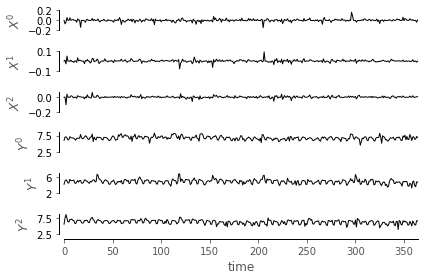

In [22]:
tp.plot_timeseries(dataframe_companies); plt.show()

# Partial Correlation

In [23]:
parcorr = ParCorr(significance='analytic')

pcmci = PCMCI(
    dataframe=dataframe_companies, 
    cond_ind_test=parcorr,
    verbosity=1)


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 28


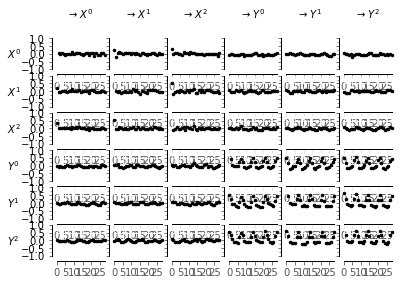

In [24]:
correlations = pcmci.get_lagged_dependencies(tau_max=28, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                    setup_args={'var_names':var_names_companies, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [25]:
results = pcmci.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 7 link(s):
        ($Y^2$ -8): max_pval = 0.03259, min_val = -0.114
        ($Y^0$ -3): max_pval = 0.08730, min_val = -0.092
        ($X^1$ -2): max_pval = 0.13692, min_val = -0.080
        ($X^1$ -3): max_pval = 0.21551, min_val = -0.066
        ($X^2$ -8): max_pval = 0.43052, min_val = -0.043
        ($Y^1$ -6): max_pval = 0.48111, min_val =  0.038
        ($X^2$ -6): max_pval = 0.49147, min_val =  0.037

    Variable $X^1$ has 11 link(s):
        ($X^0$ -1): max_pval = 0.00335, min_val = -0.157
        ($Y^0$ -5): max_pval = 0.02937, min_val = -0.117
        ($X^1$ -7): max_pval = 0.07701, min_val = -0.095
        ($X^1$ -2): max_pval = 0.12567, min_val = -0.082
        ($X^1$ -4): max_pval = 0.13236, min_val = -0.081
        ($Y^0$ -4): ma

In [27]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], 
                                        tau_max=8, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 2 link(s):
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.319
        ($X^1$  0): pval = 0.00002 | qval = 0.00002 | val =  0.233

    Variable $X^1$ has 3 link(s):
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.569
        ($X^0$  0): pval = 0.00002 | qval = 0.00002 | val =  0.233
        ($Y^1$  0): pval = 0.00864 | qval = 0.00864 | val =  0.145

    Variable $X^2$ has 2 link(s):
        ($X^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.569
        ($X^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.319

    Variable $Y^0$ has 3 link(s):
        ($Y^0$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.301
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.279
        ($Y^2$  0): pval = 0.00328 | qval = 0.00328 | val =  0.160

    Variable $Y^1$ has 4 link(s):
        ($Y^1$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.445
        ($Y^2$  0): pval = 0.00000 | qval = 0.000

In [28]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

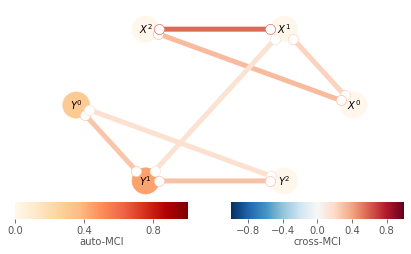

In [29]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

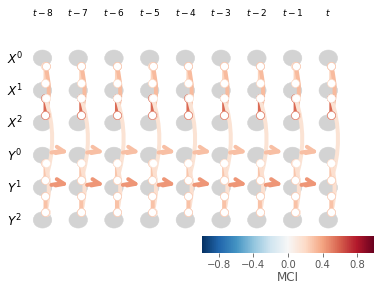

In [30]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='MCI',
    ); plt.show()

# GPDC

In [31]:
gpdc = GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe_companies, 
    cond_ind_test=gpdc,
    verbosity=0)

In [32]:
results = pcmci_gpdc.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\en

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t

c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
c:\users\97155\anaconda3\envs\t


## Significant links at alpha = 0.01:

    Variable $X^0$ has 9 link(s):
        ($X^2$  0): pval = 0.00000 | val =  0.367
        ($X^1$  0): pval = 0.00000 | val =  0.341
        ($Y^2$  0): pval = 0.00000 | val =  0.246
        ($Y^1$  0): pval = 0.00000 | val =  0.227
        ($X^0$ -7): pval = 0.00000 | val =  0.192
        ($Y^2$ -7): pval = 0.00000 | val =  0.179
        ($X^1$ -7): pval = 0.00200 | val =  0.169
        ($Y^0$  0): pval = 0.00300 | val =  0.168
        ($X^2$ -7): pval = 0.00600 | val =  0.157

    Variable $X^1$ has 6 link(s):
        ($X^2$  0): pval = 0.00000 | val =  0.498
        ($X^0$  0): pval = 0.00000 | val =  0.341
        ($Y^1$  0): pval = 0.00000 | val =  0.197
        ($Y^2$ -7): pval = 0.00000 | val =  0.175
        ($Y^2$ -2): pval = 0.00700 | val =  0.156
        ($X^0$ -7): pval = 0.01000 | val =  0.150

    Variable $X^2$ has 7 link(s):
        ($X^1$  0): pval = 0.00000 | val =  0.498
        ($X^0$  0): pval = 0.00000 | val =  0.367
      

In [33]:
q_matrix = pcmci_gpdc.get_corrected_pvalues(p_matrix=results['p_matrix'], 
                                            tau_max=8, fdr_method='fdr_bh')
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,  
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 7 link(s):
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.367
        ($X^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.341
        ($Y^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.246
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.227
        ($X^0$ -7): pval = 0.00000 | qval = 0.00000 | val =  0.192
        ($Y^2$ -7): pval = 0.00000 | qval = 0.00000 | val =  0.179
        ($Y^0$  0): pval = 0.00300 | qval = 0.00300 | val =  0.168

    Variable $X^1$ has 4 link(s):
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.498
        ($X^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.341
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.197
        ($Y^2$ -7): pval = 0.00000 | qval = 0.00000 | val =  0.175

    Variable $X^2$ has 7 link(s):
        ($X^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.498
        ($X^0$  0): pval = 0.00000 | qval = 0.00000 

In [34]:
link_matrix = pcmci_gpdc.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

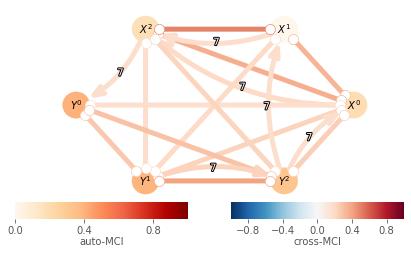

In [35]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

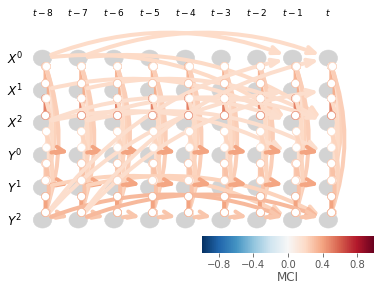

In [36]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='MCI',
    ); plt.show()